In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
datapath = '../../../data/antenna-only/'
cases = ['no-antenna', 'single-antenna', 'dual-antenna']

In [3]:
reference = np.load(os.path.join(datapath, 'no-antenna', 'recording.npy'))
# reference = np.mean(reference[:, 0, :], axis=0)
reference = reference[50, 0, :]
reference.shape

(150,)

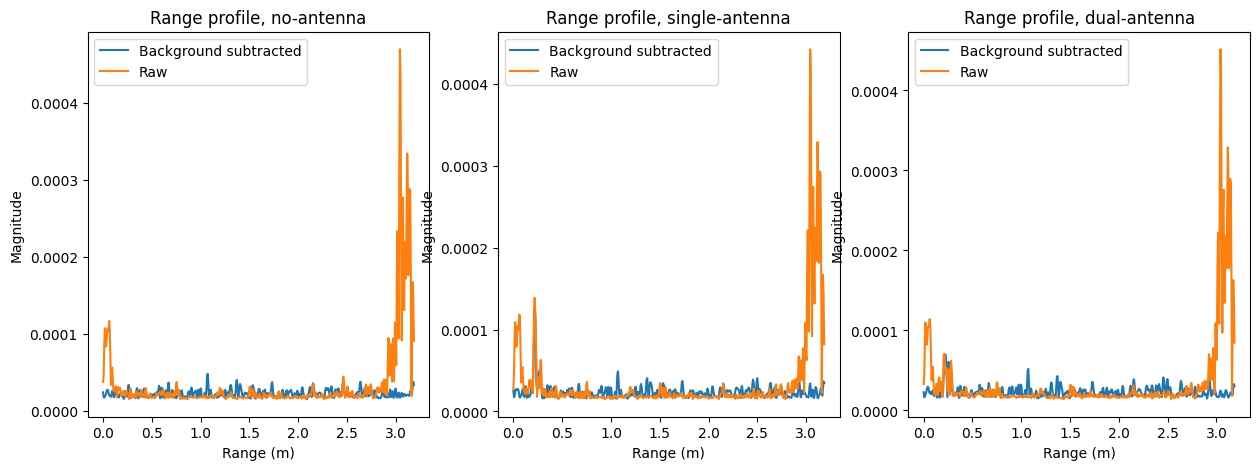

In [11]:
plt.subplots(1, 3, figsize=(15, 5))
for i, case in enumerate(cases):
    data = np.load(os.path.join(datapath, case, 'recording.npy'))
    cfg = np.load(os.path.join(datapath, case, 'config.npy'), allow_pickle=True).item()
    nfft = cfg['nfft']
    dist_vec = cfg['dist_vec']
    rp = np.fft.ifft(data[:, 0, :], axis=1, n=nfft)
    range_bin = np.argmax(dist_vec > 0.3)

    bkg_sub = data - reference
    rp_bkg_sub = np.fft.ifft(bkg_sub[:, 0, :], axis=1, n=nfft)

    width = 25
    plt.subplot(1, 3, i+1)
    # plt.plot(dist_vec[range_bin - width : range_bin + width], np.mean(np.abs(rp_bkg_sub), axis=0)[range_bin - width : range_bin + width])
    # plt.ylim([0, 0.00015])
    # plt.plot(dist_vec[range_bin - width : range_bin + width], np.mean(np.abs(rp), axis=0)[range_bin - width : range_bin + width])
    # plt.plot(dist_vec[40:-40], np.mean(np.abs(rp), axis=0)[40:-40])
    # plt.ylim([1e-5, 7e-5])
    # plt.ylim([0, 0.00015])
    plt.plot(dist_vec, np.mean(np.abs(rp_bkg_sub), axis=0))
    plt.plot(dist_vec, np.mean(np.abs(rp), axis=0))
    plt.legend(["Background subtracted", "Raw"])
    plt.xlabel('Range (m)')
    plt.ylabel('Magnitude')
    plt.title("Range profile, " + case)